In [1]:
import numpy as np
import scipy as sp
from scipy import integrate
import matplotlib.pyplot as plt
import sympy
%matplotlib inline
sympy.init_printing()

In [2]:
t, k, T0, Ta = sympy.symbols("t, k, T_0, T_a")
T = sympy.Function("T")

In [3]:
ode = T(t).diff(t) + k*(T(t) - Ta)
sympy.Eq(ode)

In [4]:
# Solve
ode_sol = sympy.dsolve(ode)
ode_sol

In [5]:
# Initial conditions
ics = {T(0): T0}
ics

In [6]:
C_eq = sympy.Eq(ode_sol.lhs.subs(t,0).subs(ics), ode_sol.rhs.subs(t, 0))
C_eq

In [7]:
C_sol = sympy.solve(C_eq)
C_sol

In [9]:
T_t_sol = ode_sol.subs(C_sol[0])
T_t_sol

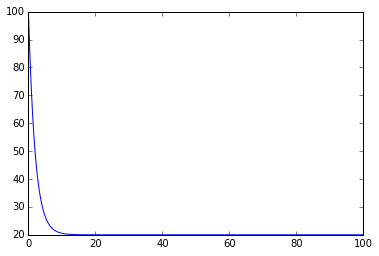

In [10]:
tt = np.linspace(0,100, 250)
T_t = sympy.lambdify(t, T_t_sol.rhs.subs({T0: 100, Ta: 20, k: 0.5}), 'numpy')
plt.plot(tt, T_t(tt))

# Laser Rate Eqn: 2-level

In [12]:
from sympy.physics.quantum.constants import hbar

In [16]:
t, tau, N_0, I_s, I_p, r, omega_980, omega_1550, sigma_980, sigma_1550, hbar = \
sympy.symbols("t, tau, N_0, I_s, I_p, r, omega_980, omega_1550, sigma_980, sigma_1550, hbar")

N2 = sympy.Function("N2")

In [14]:
N1 = 1-N2(t)

Spe_21 = - N2(t) / tau
Abs_13 = (I_p*sigma_980* N1)/(hbar*omega_980)
Abs_12 = (I_s*sigma_1550* N2(t))/(hbar*omega_1550)
Ste_21 = (I_s*sigma_1550* N2(t))/(hbar*omega_1550)

ode = N2(t).diff(t)  - (- Spe_21 + Abs_13 + Abs_12 - Ste_21)
sympy.Eq(ode)

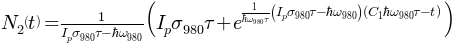

In [15]:
# Solve
ode_sol = sympy.dsolve(ode)
ode_sol

In [54]:
ics = {N2(0): N_0}
ics

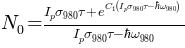

In [55]:
C_eq = sympy.Eq(ode_sol.lhs.subs(t,0).subs(ics), ode_sol.rhs.subs(t, 0))
C_eq

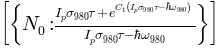

In [56]:
C_sol = sympy.solve(C_eq)
C_sol

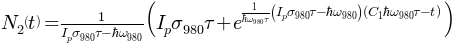

In [57]:
N2_t_sol = ode_sol.subs(C_sol[0])
N2_t_sol

In [61]:
tt = np.linspace(0, 100, 250)
# for rdiff in [0.1, 0.2, 0.3, 10, 100]:
# t, tau, N_0, I, r, omega_980, omega_1550, sigma_980, sigma_1550, hbar
N2_t = sympy.lambdify(t, N2_t_sol.rhs.subs({tau: 100, N_0: 1, I: 1E-7, r: 0, \
            omega_980: 4E-25, omega_1550: 1E-25, sigma_980: 980E-9, sigma_1550: 1550E-9, hbar: 1E-34}), 'numpy')

plt.plot(tt, N2_t(tt)) # label=rdiff
plt.xlabel('t (ms)')
plt.ylabel('N2(t)')
plt.legend()

AttributeError: 'Mul' object has no attribute 'exp'